In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


In [8]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\indian_liver_patient - indian_liver_patient (1).csv")

In [9]:
data.shape

(583, 11)

In [10]:
d = data.copy()

In [11]:
d1 = data.copy()

In [12]:
d

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [13]:
d.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
d.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [15]:
d["Albumin_and_Globulin_Ratio"] = d["Albumin_and_Globulin_Ratio"].fillna(d["Albumin_and_Globulin_Ratio"].median())

In [16]:
d.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [17]:
d1["Albumin_and_Globulin_Ratio"] = d1["Albumin_and_Globulin_Ratio"].fillna(d1["Albumin_and_Globulin_Ratio"].median())

In [18]:
d1["Dataset"] = d1["Dataset"].replace([2,1], [1,0])

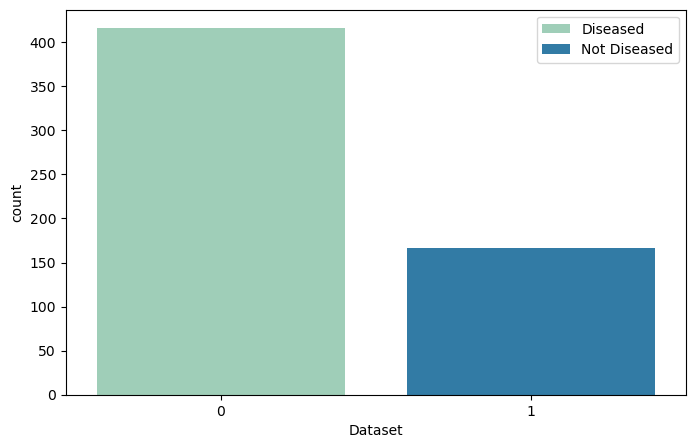

In [19]:
plt.figure(figsize = (8,5))
sns.countplot(x = "Dataset", data = d1, palette = "YlGnBu")
plt.legend(labels = ["Diseased", "Not Diseased"])
plt.show()

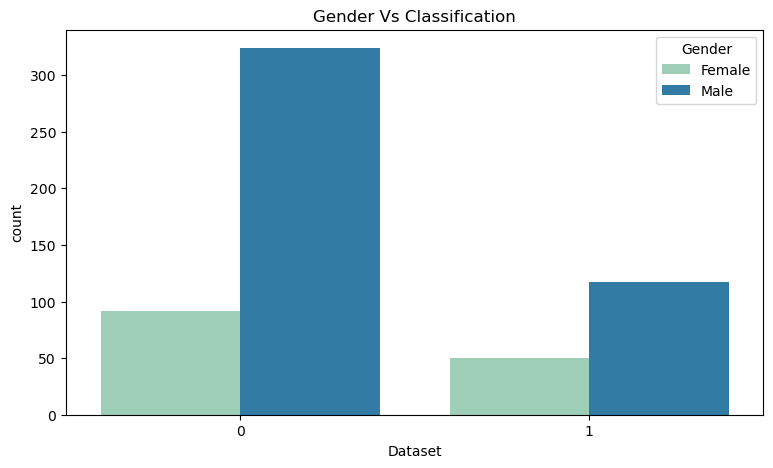

In [20]:
plt.figure(figsize = (9,5))
sns.countplot(x = 'Dataset', hue = "Gender", data = d1, palette = "YlGnBu")
plt.title("Gender Vs Classification")
plt.show()

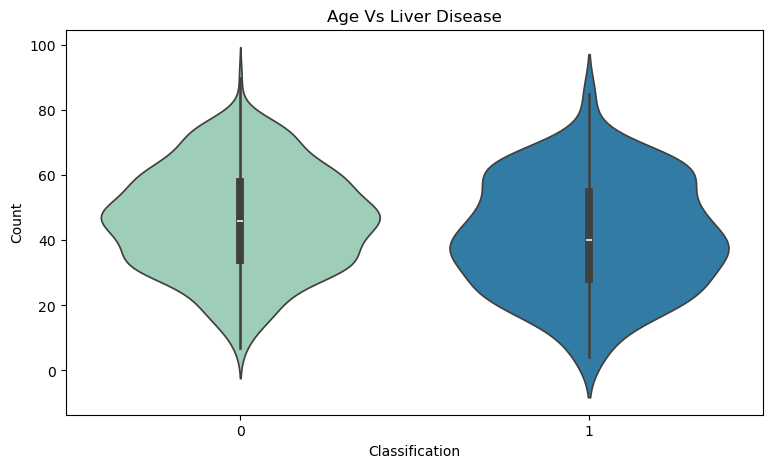

In [42]:
plt.figure(figsize = (9,5))
sns.violinplot(x='Dataset', y='Age', data=d1, palette = "YlGnBu")
plt.title("Age Vs Liver Disease")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()

In [30]:
d1["Dataset"].value_counts()

Dataset
0    416
1    167
Name: count, dtype: int64

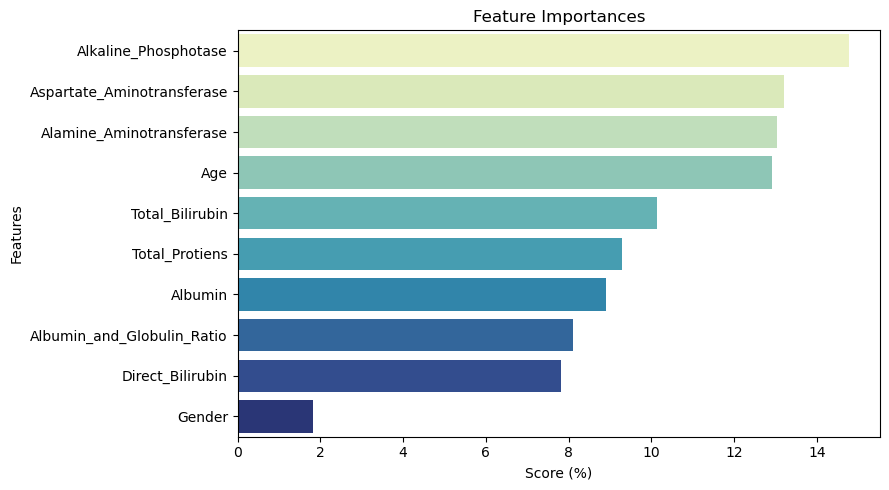

In [31]:
le = LabelEncoder()
d1["Gender"] = le.fit_transform(d1["Gender"])

X = d1.drop("Dataset", axis=1)
Y = d1["Dataset"]

fs = RandomForestClassifier(random_state=42, n_estimators=300)
fs.fit(X, Y)

fi = pd.DataFrame({
    "col": X.columns,
    "Score": fs.feature_importances_ * 100
}).sort_values("Score", ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x="Score", y="col", data=fi, palette="YlGnBu")
plt.title("Feature Importances")
plt.xlabel("Score (%)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [32]:
print(X.dtypes)

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object


In [33]:
d["Dataset"] = d["Dataset"].replace([2,1], [1,0])
x = d.drop("Dataset", axis=1)
y = d["Dataset"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=50)

In [35]:
encoders = {}
for col in x_train.select_dtypes(include="object"):
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col]  = le.transform(x_test[col])
    encoders[col]= le

In [36]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [37]:
st = SMOTE(sampling_strategy = 1, random_state=42)
x_train_st, y_train_st = st.fit_resample(x_train_scaled, y_train)

In [45]:
LR = LogisticRegression(random_state = 60)
LR.fit(x_train_st, y_train_st)

LR_y_prediction = LR.predict(x_test_scaled)
LR_y_prob = LR.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, LR_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, LR_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train_st, LR.predict(x_train_st)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, LR_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       160
           1       0.52      0.86      0.65        74

    accuracy                           0.71       234
   macro avg       0.72      0.75      0.70       234
weighted avg       0.79      0.71      0.72       234

ROC-AUC: 0.8
Training Accuracy :  0.69
Test Accuracy :  0.71


In [46]:
LR_y_prob    = LR.predict_proba(x_test_scaled)[:, 1]
LR_y_pred_th = (LR_y_prob >= 0.7).astype(int)
print(classification_report(y_test, LR_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, LR_y_prob))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       160
           1       0.61      0.38      0.47        74

    accuracy                           0.73       234
   macro avg       0.68      0.63      0.64       234
weighted avg       0.71      0.73      0.71       234

ROC-AUC: 0.799831081081081


In [47]:
RFC = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    class_weight='balanced',
    random_state=15
)
RFC.fit(x_train, y_train)

RFC_y_prediction = RFC.predict(x_test)
RFC_y_prob = RFC.predict_proba(x_test)[:,1]

print(classification_report(y_test, RFC_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, RFC_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train, RFC.predict(x_train)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, RFC_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       160
           1       0.67      0.22      0.33        74

    accuracy                           0.72       234
   macro avg       0.70      0.58      0.57       234
weighted avg       0.71      0.72      0.67       234

ROC-AUC: 0.78
Training Accuracy :  1.0
Test Accuracy :  0.72


In [48]:
RFC_y_prob    = RFC.predict_proba(x_test)[:, 1]
RFC_y_pred_th = (RFC_y_prob >= 0.4).astype(int)
print(classification_report(y_test, RFC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, RFC_y_prob))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       160
           1       0.58      0.47      0.52        74

    accuracy                           0.73       234
   macro avg       0.68      0.66      0.67       234
weighted avg       0.71      0.73      0.72       234

ROC-AUC: 0.7779983108108108


In [49]:
KNN = KNeighborsClassifier(n_neighbors = 10)

KNN.fit(x_train, y_train)

KNN_y_prediction = KNN.predict(x_test)
KNN_y_prob = KNN.predict_proba(x_test)[:,1]

print(classification_report(y_test, KNN_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, KNN_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train, KNN.predict(x_train)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, KNN_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       160
           1       0.61      0.19      0.29        74

    accuracy                           0.71       234
   macro avg       0.66      0.57      0.55       234
weighted avg       0.68      0.71      0.65       234

ROC-AUC: 0.71
Training Accuracy :  0.74
Test Accuracy :  0.71


In [50]:
XGBC = XGBClassifier(random_state = 80, eval_metric='logloss', use_label_encoder=False, n_estimators = 400) 

XGBC.fit(x_train_st, y_train_st)

XGBC_y_prediction = XGBC.predict(x_test_scaled)
XGBC_y_prob = XGBC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, XGBC_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, XGBC_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train_st, XGBC.predict(x_train_st)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, XGBC_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       160
           1       0.63      0.45      0.52        74

    accuracy                           0.74       234
   macro avg       0.70      0.66      0.67       234
weighted avg       0.73      0.74      0.73       234

ROC-AUC: 0.75
Training Accuracy :  1.0
Test Accuracy :  0.74


In [51]:
XGBC_y_prob = XGBC.predict_proba(x_test_scaled)[:, 1]
XGBC_y_pred_th = (XGBC_y_prob >= 0.5).astype(int)
print(classification_report(y_test, XGBC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, XGBC_y_prob))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       160
           1       0.63      0.45      0.52        74

    accuracy                           0.74       234
   macro avg       0.70      0.66      0.67       234
weighted avg       0.73      0.74      0.73       234

ROC-AUC: 0.7477195945945946


In [ ]:
joblib.dump(LR, "models/Liver/LR_Liver.pkl")
joblib.dump(encoders, "models/Liver/LR_Liver_encoder.pkl")
joblib.dump(scaler, "models/Liver/LR_Liver_scaler.pkl")
joblib.dump(x_train.columns.tolist(), "Models/Liver/LR_feature_names_Liver.pkl")